In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow as tf



In [6]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()


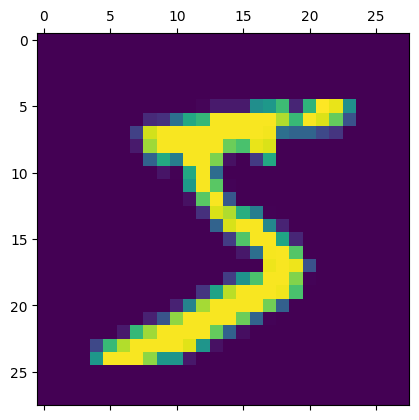

In [7]:
plt.matshow(X_train[0])

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [16]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [17]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 57s 29ms/step - loss: 0.1451 - accuracy: 0.9557
Epoch 2/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0465 - accuracy: 0.9860
Epoch 3/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0329 - accuracy: 0.9891
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0231 - accuracy: 0.9929
Epoch 5/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0188 - accuracy: 0.9938
Epoch 6/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0149 - accuracy: 0.9952
Epoch 7/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0104 - accuracy: 0.9966
Epoch 8/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0089 - accuracy: 0.9970
Epoch 9/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0087 - accuracy: 0.9970
Epoch 10/10
1875/1875 [==============================] - 57s 30m

In [21]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

313/313 [==============================] - 8s 25ms/step


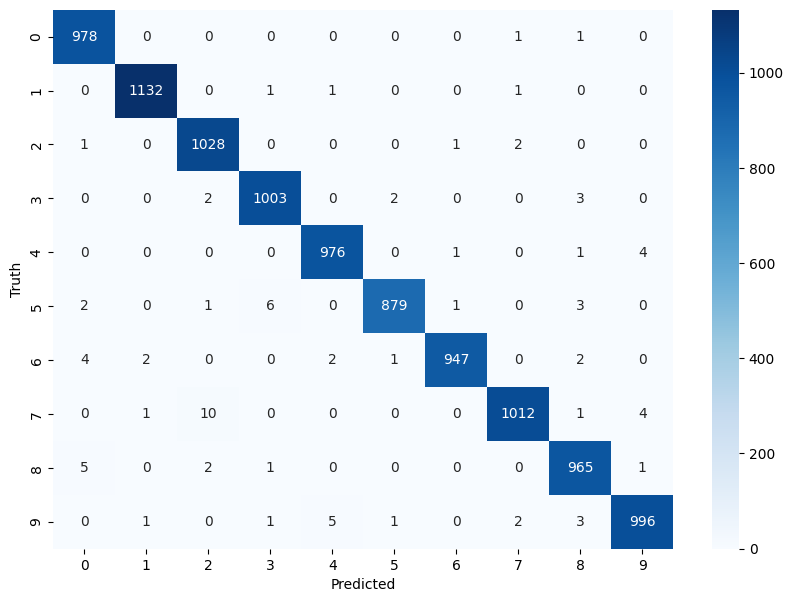

In [25]:
import seaborn as sn

y_predicted = cnn.predict(X_test)

y_predicted_labels = [np.argmax(i) for i in y_predicted]

# Confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels).numpy()

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()